In [16]:
import numpy as np
import xarray as xr
from scipy import stats
import scipy
from scipy.stats import linregress
import netCDF4 as nc4
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [17]:
font = {'family' : 'calibri',
       'weight': 'bold',
       'size': 20}
plt.rc('font', **font)
plt.rc('axes',edgecolor='k',linewidth=3)

In [18]:
# Function to filter the data

def nan_gaussian_filter(field,sigma):
    from scipy.ndimage import gaussian_filter
    field = np.double(field)    
    # Take the original field and replace the NaNs with zeros.
    field0 = field.copy()
    field0[np.isnan(field)] = 0
    ff = gaussian_filter(field0, sigma=sigma)
    # Create the smoothed weight field.
    weight = 0*field.copy()+1
    weight[np.isnan(field)] = 0
    ww = gaussian_filter(weight, sigma=sigma)
    zz = ff/(ww*weight) # This rescale for the actual weights used in the filter and set to NaN where the field
                        # was originally NaN.
    return zz


def mesh(lat,lon):
    mesh_lat = np.empty([len(lat),len(lon)])
    mesh_lon = np.empty([len(lat),len(lon)])
    for i in range(len(lat)):
        for j in range(len(lon)):
            mesh_lat[i,j] = lat[i]
            mesh_lon[i,j] = lon[j]
    return mesh_lat, mesh_lon



In [27]:
fn = '/scratch/b/b381639/intake_demo_data/test.nc'
ds = xr.open_dataset(fn)
dout = ds.copy(deep=False)

In [47]:
vsm=dout.hfls.copy(deep=False)

In [49]:
for j in range(vsm.data.shape[0]):
    vsm.data[j,:] = nan_gaussian_filter(vsm.data[j,:],6)

In [54]:
dout['vsm']=vsm

In [55]:
dout

<xarray.Dataset>
Dimensions:    (time: 10, bnds: 2, cell: 14701, nv: 3)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-20T10:30:00 ... 2020-01-29T10:30:00
    clon       (cell) float64 -1.046 -1.047 -1.045 ... -0.8766 -0.8779 -0.8779
    clat       (cell) float64 0.1086 0.1072 0.1135 ... 0.09099 0.08786 0.08906
Dimensions without coordinates: bnds, cell, nv
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2020-01-20 ... 2020-01-29T21:00:00
    clon_bnds  (cell, nv) float64 -1.048 -1.045 -1.046 ... -0.8779 -0.8791
    clat_bnds  (cell, nv) float64 0.108 0.1079 0.11 ... 0.08842 0.09043 0.0885
    hfls       (time, cell) float32 -95.11 -95.12 -95.16 ... -152.4 -152.5
    vsm        (time, cell) float32 -95.11 -95.12 -95.16 ... -152.4 -152.5
Attributes:
    CDI:                       Climate Data Interface version 2.0.3 (https://...
    Conventions:               CF-1.6
    source:                    git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded...
    institution:               Max Planck Institute for Meteorology/Deutscher...
    title:                     ICON simulation
    references:                see MPIM/DWD publications
    comment:                   Sapphire Dyamond (k203123) on l40572 (Linux 4....
    NCO:                       netCDF Operators version 5.0.6 (Homepage = htt...
    history:                   Thu Jul 14 16:20:51 2022: cdo seltimestep,1/10...
    frequency:                 day
    cdo_openmp_thread_number:  4
    CDO:                       Climate Data Operators version 2.0.3 (https://...

In [56]:
dout.to_netcdf("dout.nc")

In [52]:
vsm.to_netcdf("dout_x.nc")

In [37]:
deddy = ds.copy(deep=False)
deddy.hfls.data = ds.hfls.data-dout.hfls.data


In [42]:
ds.to_netcdf("dout.nc")


In [43]:
dout.to_netcdf("dout.nc",'a')

In [44]:
deddy.to_netcdf("dout.nc",'a')

In [4]:
#/work/bb1153/b381639/OBS

# Load data for SeaFlux and ERA5 (SST, qair2m and wspd10m). Dimensions time x lat x lon

fil_era5 = Dataset('/work/bb1153/b381639/OBS/ERA5_wspd10m_sst_tair2m_qair2m_lhf_DJF_2008-2018_05N17N51W60W.nc')
fil_sf = Dataset('/work/bb1153/b381639/OBS/SeaFlux_wspd10m_sst_tair2m_qair2m_DJF_2008-2018_05N17N51W60W.nc')


In [5]:

lat_sf = fil_sf.variables['lat'][:]
lon_sf = fil_sf.variables['lon'][:]

lat_era5 = fil_era5.variables['lat'][:]
lon_era5 = fil_era5.variables['lon'][:]

qair2m_sf = fil_sf.variables['qair2m'][:]
wspd10m_sf = fil_sf.variables['wspd10m'][:]
sst_sf = fil_sf.variables['sst'][:]

qair2m_era5 = fil_era5.variables['qair2m'][:]
wspd10m_era5 = fil_era5.variables['wspd10m'][:]
sst_era5 = fil_era5.variables['sst'][:]
                          
                
qair2m_sf_smoothed = np.empty(qair2m_sf.shape)
wspd10m_sf_smoothed = np.empty(wspd10m_sf.shape)
sst_sf_smoothed = np.empty(sst_sf.shape)

qair2m_era5_smoothed = np.empty(qair2m_era5.shape)
wspd10m_era5_smoothed = np.empty(wspd10m_era5.shape)
sst_era5_smoothed = np.empty(sst_era5.shape)



In [10]:
print(lat_sf)

[ 5.0083823  5.205307   5.402292   5.599339   5.796451   5.99363
  6.1908784  6.3881984  6.5855923  6.783063   6.9806123  7.178243
  7.3759575  7.5737576  7.7716465  7.969626   8.167699   8.365868
  8.564135   8.762503   8.960973   9.15955    9.358233   9.557029
  9.755938   9.954961  10.154103  10.353367  10.552753  10.752266
 10.951906  11.151679  11.351585  11.551628  11.75181   11.952133
 12.152601  12.353217  12.553983  12.754901  12.955976  13.1572075
 13.358601  13.560158  13.761883  13.963777  14.165843  14.368085
 14.570505  14.773107  14.975893  15.178866  15.3820305 15.585387
 15.788941  15.992695  16.196651  16.400814  16.605185  16.809767 ]


In [11]:
print(lon_sf)

[-59.783863 -59.524494 -59.26513  -59.005764 -58.7464   -58.48703
 -58.227665 -57.9683   -57.708935 -57.449566 -57.1902   -56.930836
 -56.67147  -56.412106 -56.152737 -55.89337  -55.634007 -55.37464
 -55.115273 -54.855907 -54.596542 -54.337177 -54.07781  -53.818443
 -53.55908  -53.299713 -53.040344 -52.78098  -52.521614 -52.26225
 -52.00288  -51.743515 -51.48415  -51.224785]


In [6]:
 # Compute smoothed and residual fields

for j in range(qair2m_sf.shape[0]):
    qair2m_sf_smoothed[j,:,:] = nan_gaussian_filter(qair2m_sf[j,:,:],6)
    wspd10m_sf_smoothed[j,:,:] = nan_gaussian_filter(wspd10m_sf[j,:,:],6)
    sst_sf_smoothed[j,:,:] = nan_gaussian_filter(sst_sf[j,:,:],6)
        
    qair2m_era5_smoothed[j,:,:] = nan_gaussian_filter(qair2m_era5[j,:,:],6)
    wspd10m_era5_smoothed[j,:,:] = nan_gaussian_filter(wspd10m_era5[j,:,:],6)
    sst_era5_smoothed[j,:,:] = nan_gaussian_filter(sst_era5[j,:,:],6)
        
        
    # Calculo los campos residuo 
    qair2m_sf_residual = qair2m_sf - qair2m_sf_smoothed
    wspd10m_sf_residual = wspd10m_sf - wspd10m_sf_smoothed
    sst_sf_residual = sst_sf - sst_sf_smoothed
    
    qair2m_era5_residual = qair2m_era5 - qair2m_era5_smoothed
    wspd10m_era5_residual = wspd10m_era5 - wspd10m_era5_smoothed
    sst_era5_residual = sst_era5 - sst_era5_smoothed


In [7]:
sst_era5_residual.shape

(993, 49, 37)

In [8]:
# Compute slopes for all the datasets (smoothed and residual fields)

m_u_sf = np.empty([5,len(lat_sf),len(lon_sf)])
m_q_sf = np.empty([5,len(lat_sf),len(lon_sf)])
m_u_era5 = np.empty([5,len(lat_era5),len(lon_era5)])
m_q_era5 = np.empty([5,len(lat_era5),len(lon_era5)])

for i in range(len(lat_sf)):
    for j in range(len(lon_sf)):
        u_stats_tot = wspd10m_sf_residual[:,i,j]
        sst_stats_tot = sst_sf_residual[:,i,j]
        q_stats_tot = qair2m_sf_residual[:,i,j]

        mask_q_tot = ~np.isnan(sst_stats_tot[:]) & ~np.isnan(q_stats_tot[:])
        mask_u_tot = ~np.isnan(sst_stats_tot[:]) & ~np.isnan(u_stats_tot[:])
        
    
        varx_q_tot = sst_stats_tot[mask_q_tot]
        vary_q_tot = q_stats_tot[mask_q_tot]

        varx_u_tot = sst_stats_tot[mask_u_tot]
        vary_u_tot = u_stats_tot[mask_u_tot]
   
    
        if ((varx_q_tot.shape[0])) == 0 or ((vary_q_tot.shape[0]) == 0):
            m_q_sf[:,i,j] = np.nan *  np.ones(5)
        
        else:
            m_q_sf[:,i,j] = scipy.stats.linregress(varx_q_tot,vary_q_tot)                   
            
        if ((varx_u_tot.shape[0])) == 0 or ((vary_u_tot.shape[0]) == 0):
                    
            m_u_sf[:,i,j] = np.nan * np.ones(5)
        
        else:
            m_u_sf[:,i,j] = scipy.stats.linregress(varx_u_tot,vary_u_tot)
                   

# Do the same for ERA5
for i in range(len(lat_era5)):
    for j in range(len(lon_era5)):
        u_stats_tot = wspd10m_era5_residual[:,i,j]
        sst_stats_tot = sst_era5_residual[:,i,j]
        q_stats_tot = qair2m_era5_residual[:,i,j]

        mask_q_tot = ~np.isnan(sst_stats_tot[:]) & ~np.isnan(q_stats_tot[:])
        mask_u_tot = ~np.isnan(sst_stats_tot[:]) & ~np.isnan(u_stats_tot[:])
        
    
        varx_q_tot = sst_stats_tot[mask_q_tot]
        vary_q_tot = q_stats_tot[mask_q_tot]

        varx_u_tot = sst_stats_tot[mask_u_tot]
        vary_u_tot = u_stats_tot[mask_u_tot]

    
        if ((varx_q_tot.shape[0])) == 0 or ((vary_q_tot.shape[0]) == 0):
            m_q_era5[:,i,j] = np.nan *  np.ones(5)
        
        else:
            m_q_era5[:,i,j] = scipy.stats.linregress(varx_q_tot,vary_q_tot)                   
            
        if ((varx_u_tot.shape[0])) == 0 or ((vary_u_tot.shape[0]) == 0):
                    
            m_u_era5[:,i,j] = np.nan * np.ones(5)
        
        else:
            m_u_era5[:,i,j] = scipy.stats.linregress(varx_u_tot,vary_u_tot)

# Same for the smoothed fields

m_u_s_sf = np.empty([5,len(lat_sf),len(lon_sf)])
m_q_s_sf = np.empty([5,len(lat_sf),len(lon_sf)])
m_u_s_era5 = np.empty([5,len(lat_era5),len(lon_era5)])
m_q_s_era5 = np.empty([5,len(lat_era5),len(lon_era5)])



for i in range(len(lat_sf)):
    for j in range(len(lon_sf)):
        u_stats_tot = wspd10m_sf_smoothed[:,i,j]
        sst_stats_tot = sst_sf_smoothed[:,i,j]
        q_stats_tot = qair2m_sf_smoothed[:,i,j]


        mask_q_tot = ~np.isnan(sst_stats_tot[:]) & ~np.isnan(q_stats_tot[:])
        mask_u_tot = ~np.isnan(sst_stats_tot[:]) & ~np.isnan(u_stats_tot[:])
        
    
        varx_q_tot = sst_stats_tot[mask_q_tot]
        vary_q_tot = q_stats_tot[mask_q_tot]

        varx_u_tot = sst_stats_tot[mask_u_tot]
        vary_u_tot = u_stats_tot[mask_u_tot]
   
    
        if ((varx_q_tot.shape[0])) == 0 or ((vary_q_tot.shape[0]) == 0):
            m_q_s_sf[:,i,j] = np.nan *  np.ones(5)
        
        else:
            m_q_s_sf[:,i,j] = scipy.stats.linregress(varx_q_tot,vary_q_tot)                   
            
        if ((varx_u_tot.shape[0])) == 0 or ((vary_u_tot.shape[0]) == 0):
                    
            m_u_s_sf[:,i,j] = np.nan * np.ones(5)
        
        else:
            m_u_s_sf[:,i,j] = scipy.stats.linregress(varx_u_tot,vary_u_tot)            
            
# Again for ERA5

for i in range(len(lat_era5)):
    for j in range(len(lon_era5)):
        u_stats_tot = wspd10m_era5_smoothed[:,i,j]
        sst_stats_tot = sst_era5_smoothed[:,i,j]
        q_stats_tot = qair2m_era5_smoothed[:,i,j]

        mask_q_tot = ~np.isnan(sst_stats_tot[:]) & ~np.isnan(q_stats_tot[:])
        mask_u_tot = ~np.isnan(sst_stats_tot[:]) & ~np.isnan(u_stats_tot[:])
            
        varx_q_tot = sst_stats_tot[mask_q_tot]
        vary_q_tot = q_stats_tot[mask_q_tot]

        varx_u_tot = sst_stats_tot[mask_u_tot]
        vary_u_tot = u_stats_tot[mask_u_tot]
   
    
        if ((varx_q_tot.shape[0])) == 0 or ((vary_q_tot.shape[0]) == 0):
            m_q_s_era5[:,i,j] = np.nan *  np.ones(5)
        
        else:
            m_q_s_era5[:,i,j] = scipy.stats.linregress(varx_q_tot,vary_q_tot)                   
            
        if ((varx_u_tot.shape[0])) == 0 or ((vary_u_tot.shape[0]) == 0):
                    
            m_u_s_era5[:,i,j] = np.nan * np.ones(5)
        
        else:
            m_u_s_era5[:,i,j] = scipy.stats.linregress(varx_u_tot,vary_u_tot)
            

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


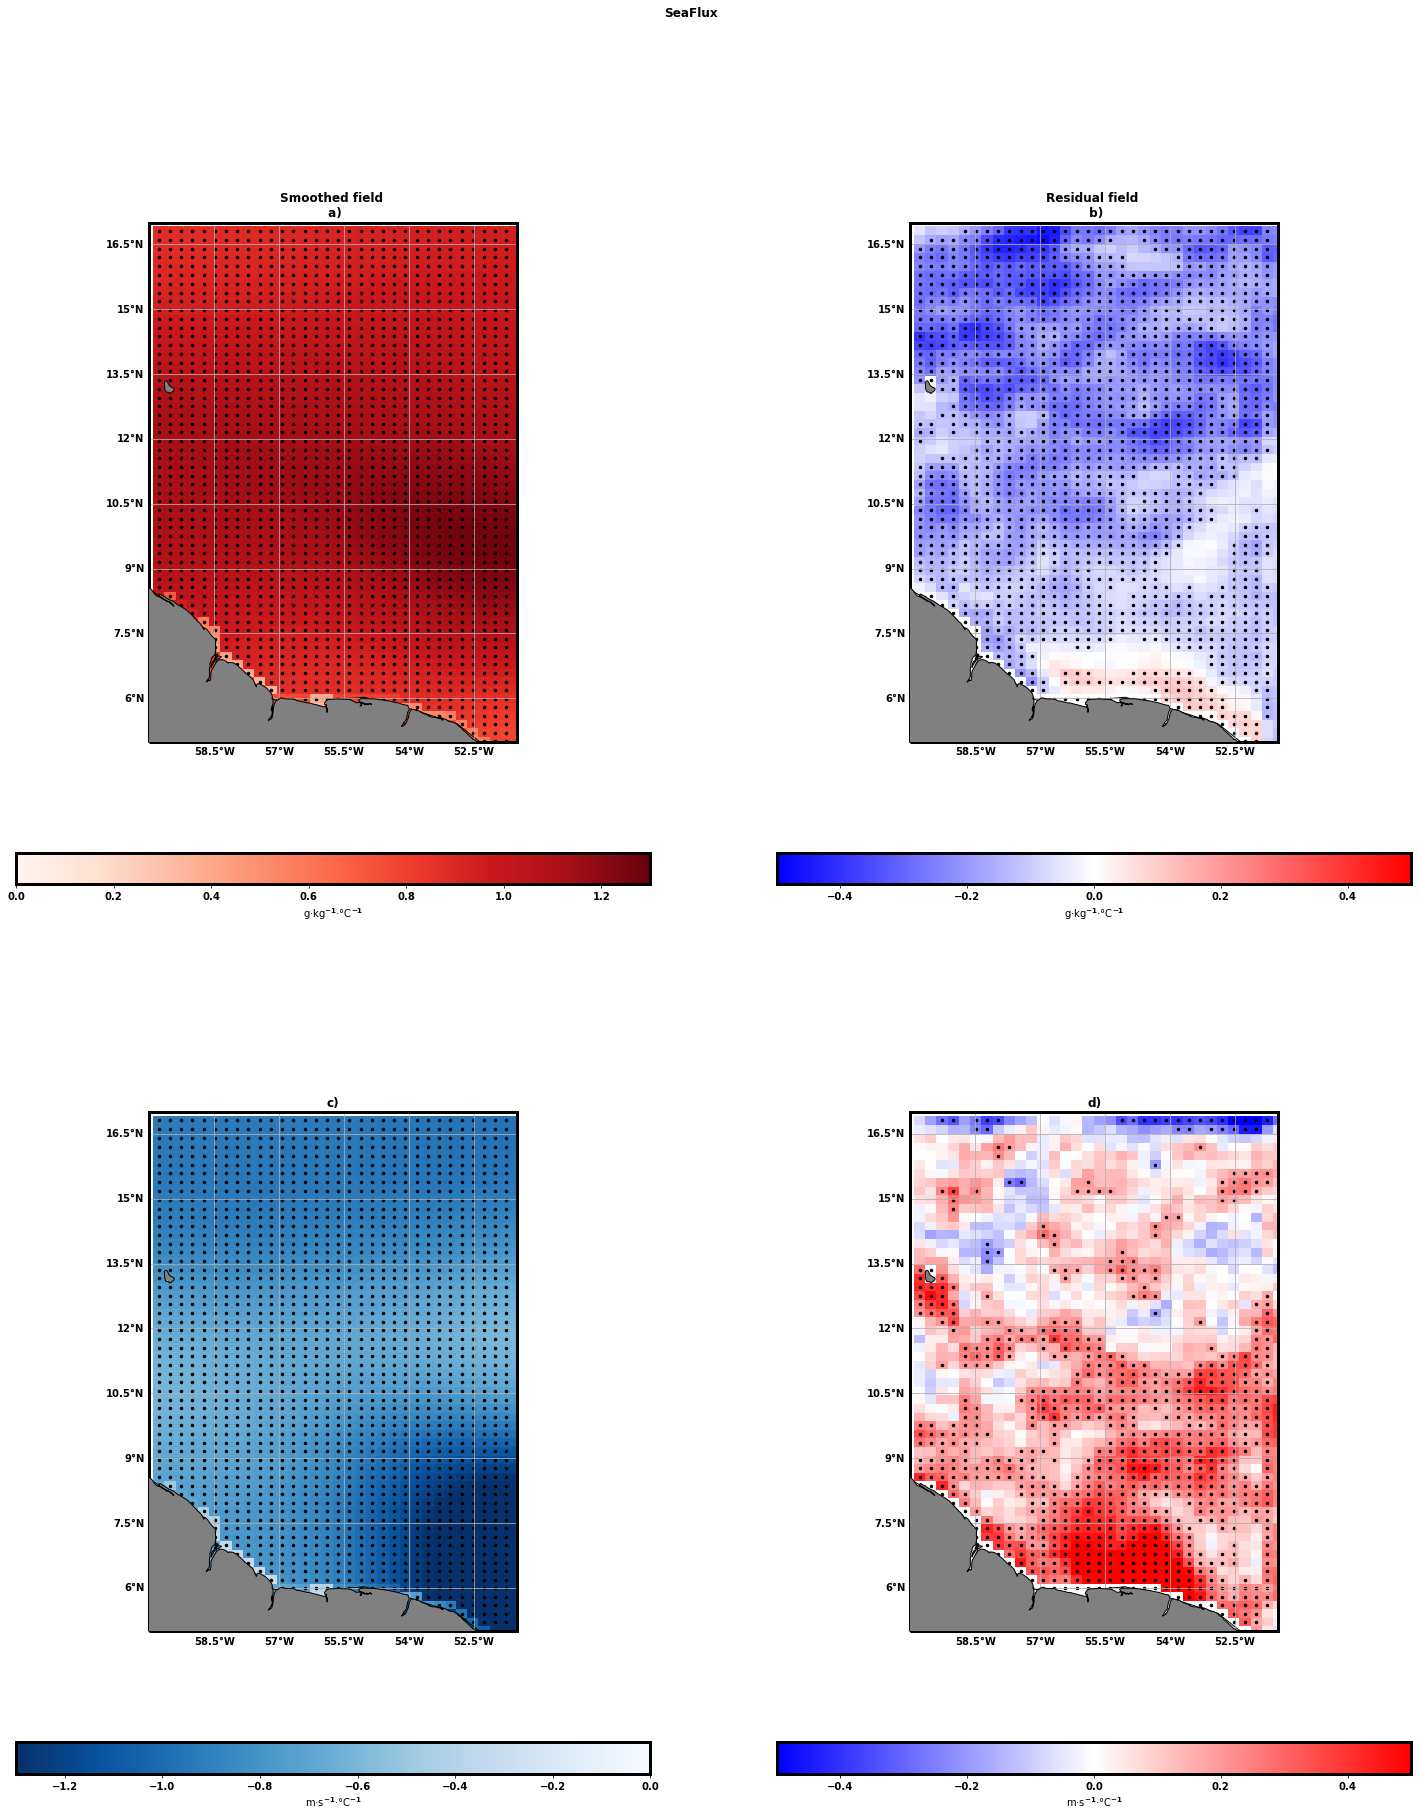

In [9]:
# Plot the coefficients 

#######################################

# SeaFlux

#######################################

lat_central = lat_sf
lon_central = lon_sf
Lat_central, Lon_central = mesh(lat_sf,lon_sf)


figTS,axs = plt.subplots(2,2,figsize=(25,30), subplot_kw={'projection': ccrs.PlateCarree(180)})
lev_1 = np.arange(-1,1.2,0.2)
lev_2 = np.arange(-1,1.2,0.2)

        
plt.suptitle('SeaFlux' ,weight='bold')
        
cs_1 = axs[0,0].pcolormesh(np.asarray(lon_central),np.asarray(lat_central),(m_q_s_sf[0,:,:]),#,levels = lev_1,
               transform=ccrs.PlateCarree(),cmap='Reds',vmin = 0, vmax = 1.3)
        
        
LON_central = ma.masked_where(m_q_s_sf[3,:,:]>0.01, (Lon_central))
LAT_central = ma.masked_where(m_q_s_sf[3,:,:]>0.01, (Lat_central))


hatch = axs[0,0].plot(np.transpose(LON_central+180),np.transpose(LAT_central),'.',color='black',markersize=5)
        
cs_2 = axs[0,1].pcolormesh(np.asarray(lon_central),np.asarray(lat_central),(m_q_sf[0,:,:]),#,levels = lev_1,
               transform=ccrs.PlateCarree(),cmap='bwr',vmin = -0.5, vmax = 0.5)
        
LON_central = ma.masked_where(m_q_sf[3,:,:]>0.01, (Lon_central))
LAT_central = ma.masked_where(m_q_sf[3,:,:]>0.01, (Lat_central))

hatch = axs[0,1].plot(np.transpose(LON_central+180),np.transpose(LAT_central),'.',color='black',markersize=5)
        
cs_3 = axs[1,0].pcolormesh(np.asarray(lon_central),np.asarray(lat_central),(np.asarray(m_u_s_sf[0,:,:])), #,levels = lev_1,
               transform=ccrs.PlateCarree(),cmap='Blues_r',vmin = -1.3, vmax  =0)
        
LON_central = ma.masked_where(m_u_s_sf[3,:,:]>0.01, (Lon_central))
LAT_central = ma.masked_where(m_u_s_sf[3,:,:]>0.01, (Lat_central))

hatch = axs[1,0].plot(np.transpose(LON_central)+180,np.transpose(LAT_central),'.',color='black',markersize=5)
        
cs_4 = axs[1,1].pcolormesh(np.asarray(lon_central),np.asarray(lat_central),(np.asarray(m_u_sf[0,:,:])), #,levels = lev_1,
               transform=ccrs.PlateCarree(),cmap='bwr',vmin = -0.5, vmax = 0.5)
        
LON_central = ma.masked_where(m_u_sf[3,:,:]>0.01, (Lon_central))
LAT_central = ma.masked_where(m_u_sf[3,:,:]>0.01, (Lat_central))

hatch = axs[1,1].plot(np.transpose(LON_central)+180,np.transpose(LAT_central),'.',color='black',markersize=5)

plt.colorbar(cs_1,ax=axs[0,0],orientation='horizontal',label='g·kg$^{-1}$·°C$^{-1}$')
plt.colorbar(cs_2,ax=axs[0,1],orientation = 'horizontal',label='g·kg$^{-1}$·°C$^{-1}$')
plt.colorbar(cs_3,ax=axs[1,0],orientation='horizontal',label='m·s$^{-1}$·°C$^{-1}$')
plt.colorbar(cs_4,ax=axs[1,1],orientation='horizontal',label='m·s$^{-1}$·°C$^{-1}$')

axs[0,0].set_xlim(-60+180,-51.5+180)
axs[1,0].set_xlim(-60+180,-51.5+180)
axs[0,1].set_xlim(-60+180,-51.5+180)
axs[1,1].set_xlim(-60+180,-51.5+180)

axs[0,0].set_ylim(5,17)
axs[1,0].set_ylim(5,17)
axs[0,1].set_ylim(5,17)
axs[1,1].set_ylim(5,17)
        
        
axs[0,0].set_title('Smoothed field \n a)',weight='bold')
axs[0,1].set_title('Residual field \n b)',weight='bold')
axs[1,0].set_title(r'c)', weight='bold')
axs[1,1].set_title(r'd)',weight='bold')
        
axs[0,0].add_feature(cartopy.feature.LAND,facecolor='gray',zorder=100, edgecolor='k')
axs[0,1].add_feature(cartopy.feature.LAND,facecolor='gray',zorder=100, edgecolor='k')
axs[1,0].add_feature(cartopy.feature.LAND,facecolor='gray',zorder=100, edgecolor='k')
axs[1,1].add_feature(cartopy.feature.LAND,facecolor='gray',zorder=100, edgecolor='k')
        
cs = axs[0,0].coastlines(resolution='110m', linewidth=1)
cs = axs[0,1].coastlines(resolution='110m', linewidth=1)
cs = axs[1,0].coastlines(resolution='110m', linewidth=1)
cs = axs[1,1].coastlines(resolution='110m', linewidth=1)
        
gl = axs[0,0].gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

gl = axs[0,1].gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
        
gl = axs[1,0].gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
        
gl = axs[1,1].gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
        
plt.savefig('./Prueba_1.jpg')
